In [22]:
import os 
import cv2
import random
import shutil
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D
from tensorflow.keras.layers import MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.utils import to_categorical

Loading Data 

In [14]:
#Defining paths
orginial_folder = r"C:\Data\CXR dataset"
out_dir = r"C:\Data\split_data"
train_dir = os.path.join(out_dir,'train')
val_dir = os.path.join(out_dir,'validation')
test_dir = os.path.join(out_dir,'test')

#classes (folders names)
classes = ['Covid', 'Normal', 'Pneumonia', 'Tuberculosis']

#splitting ratio
test_size = 0.1
val_size = 0.1
#train_size = 0.8

#Creating dir
os.makedirs(train_dir,exist_ok=True)
os.makedirs(val_dir,exist_ok=True)
os.makedirs(test_dir,exist_ok=True)

for cls in classes:
    #Making class sub-dir in train,validation & test
    os.makedirs(os.path.join(train_dir,cls),exist_ok=True)
    os.makedirs(os.path.join(val_dir,cls),exist_ok=True)
    os.makedirs(os.path.join(test_dir,cls),exist_ok=True)

    #Getting all the images for this classes 
    scr_dir = os.path.join(orginial_folder,cls)
    images = [f for f in os.listdir(scr_dir) if f.lower().endswith((".png", ".jpg", ".jpeg"))]


    #separate test set(10%)
    train_val_imgs,test_imgs = train_test_split(
        images,
        test_size=test_size,
        random_state=42
    )

    #separate validation from remaining data
    val_ratio = val_size/(1-test_size)
    train_imgs,val_imgs = train_test_split(
        train_val_imgs,
        test_size=val_ratio,
        random_state=42
    )

    #Copy images to respectitive folders
    for img in train_imgs:
        shutil.copy(os.path.join(scr_dir,img),os.path.join(train_dir,cls,img))
    for img in val_imgs:
        shutil.copy(os.path.join(scr_dir,img),os.path.join(val_dir,cls,img))
    for img in test_imgs:
        shutil.copy(os.path.join(scr_dir,img),os.path.join(test_dir,cls,img))

    print(f"{cls}:Total={len(images)}, Train={len(train_imgs)}, Validation={len(val_imgs)}, Test={len(test_imgs)}")

print("\nData splitting completed!")

Covid:Total=18011, Train=14407, Validation=1802, Test=1802
Normal:Total=18097, Train=14477, Validation=1810, Test=1810
Pneumonia:Total=18187, Train=14549, Validation=1819, Test=1819
Tuberculosis:Total=18002, Train=14400, Validation=1801, Test=1801

Data splitting completed!


In [27]:
train_path = r"C:\Data\split_data\train"
test_path = r"C:\Data\split_data\test"
val_path = r"C:\Data\split_data\validation"

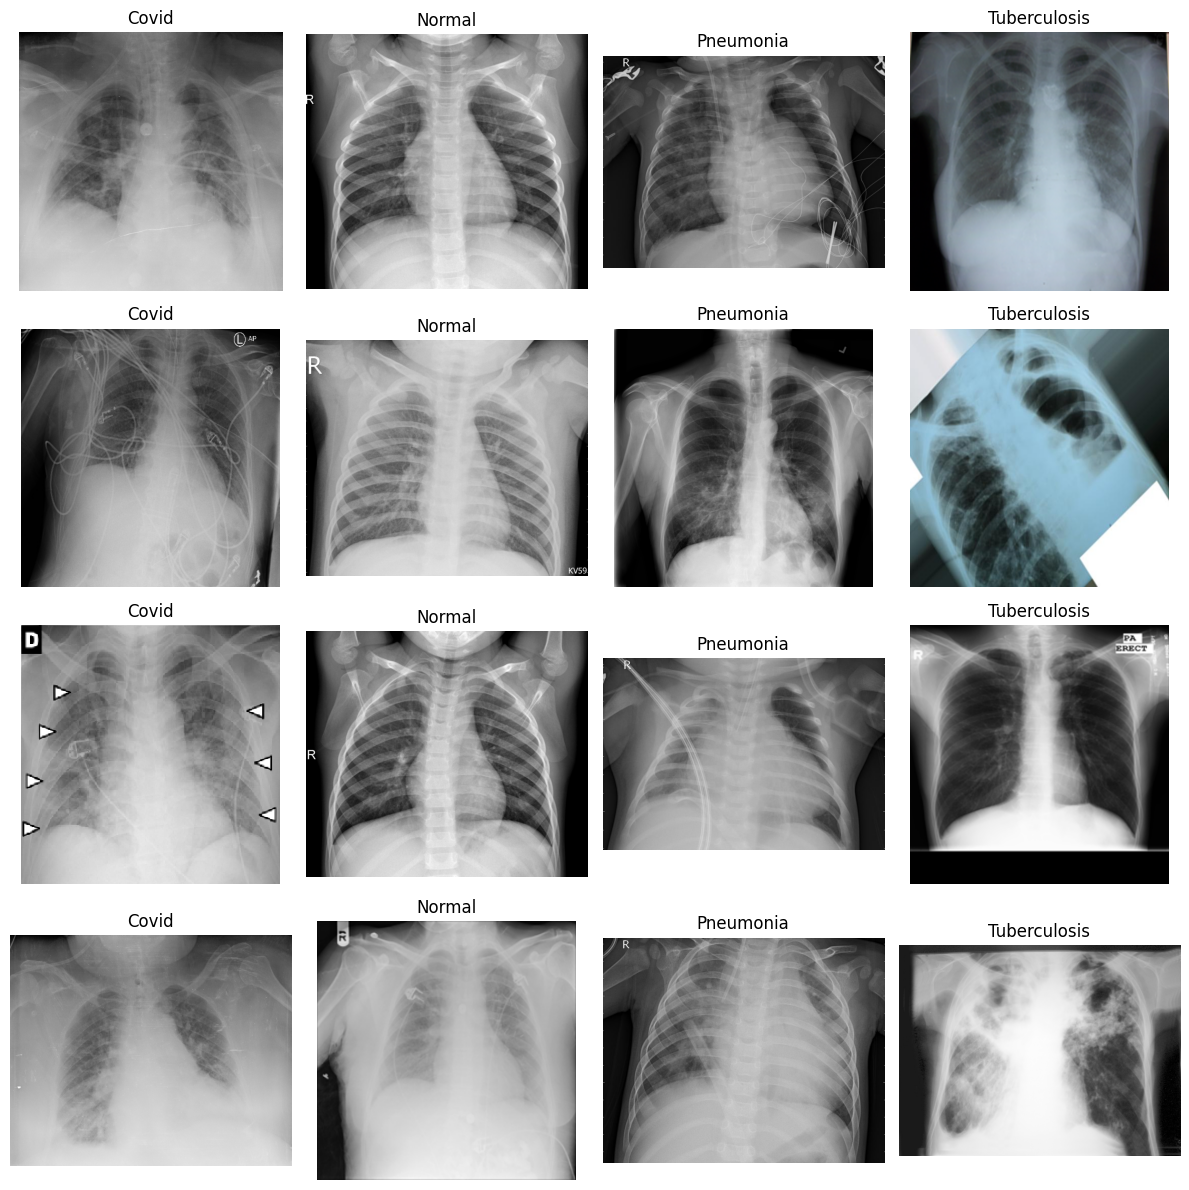

In [23]:
main_folder = r"C:\Data\split_data\train"
subfolders = [f for f in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder,f))]

#Getting images grouped by folder
folder_images = {}
for folder in subfolders:
    path = os.path.join(main_folder,folder)
    images = [os.path.join(path,img) for img in os.listdir(path) if img.lower().endswith((".png", ".jpg", ".jpeg"))]
    random.shuffle(images)
    folder_images[folder] = images


#Round-robin selection
selected_images = []
folder_cycle = cycle(subfolders)
while len(selected_images) < 16:
    folder = next(folder_cycle)
    if folder_images[folder]:
        selected_images.append(folder_images[folder].pop())

#ploting images 
plt.figure(figsize=(12, 12))
for i, img_path in enumerate(selected_images):
    img = cv2.imread(img_path)
    if img is None:
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(4, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(os.path.basename(os.path.dirname(img_path)))  # Show folder name
plt.tight_layout()
plt.show()

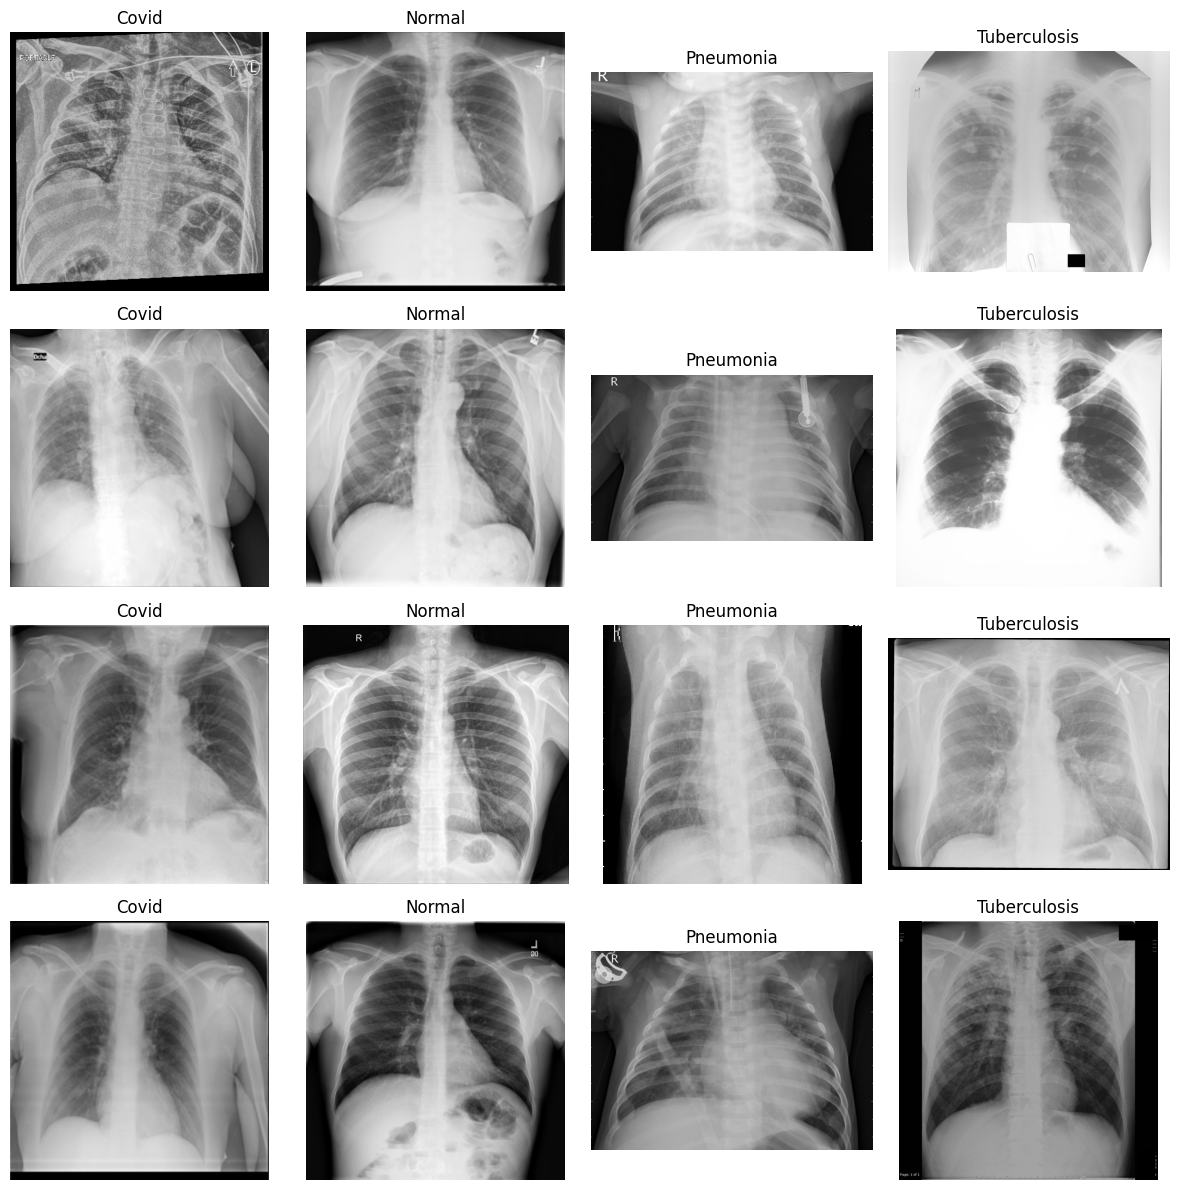

In [24]:
main_folder = r"C:\Data\split_data\validation"
subfolders = [f for f in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder,f))]

#Getting images grouped by folder
folder_images = {}
for folder in subfolders:
    path = os.path.join(main_folder,folder)
    images = [os.path.join(path,img) for img in os.listdir(path) if img.lower().endswith((".png", ".jpg", ".jpeg"))]
    random.shuffle(images)
    folder_images[folder] = images


#Round-robin selection
selected_images = []
folder_cycle = cycle(subfolders)
while len(selected_images) < 16:
    folder = next(folder_cycle)
    if folder_images[folder]:
        selected_images.append(folder_images[folder].pop())

#ploting images 
plt.figure(figsize=(12, 12))
for i, img_path in enumerate(selected_images):
    img = cv2.imread(img_path)
    if img is None:
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(4, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(os.path.basename(os.path.dirname(img_path)))  # Show folder name
plt.tight_layout()
plt.show()

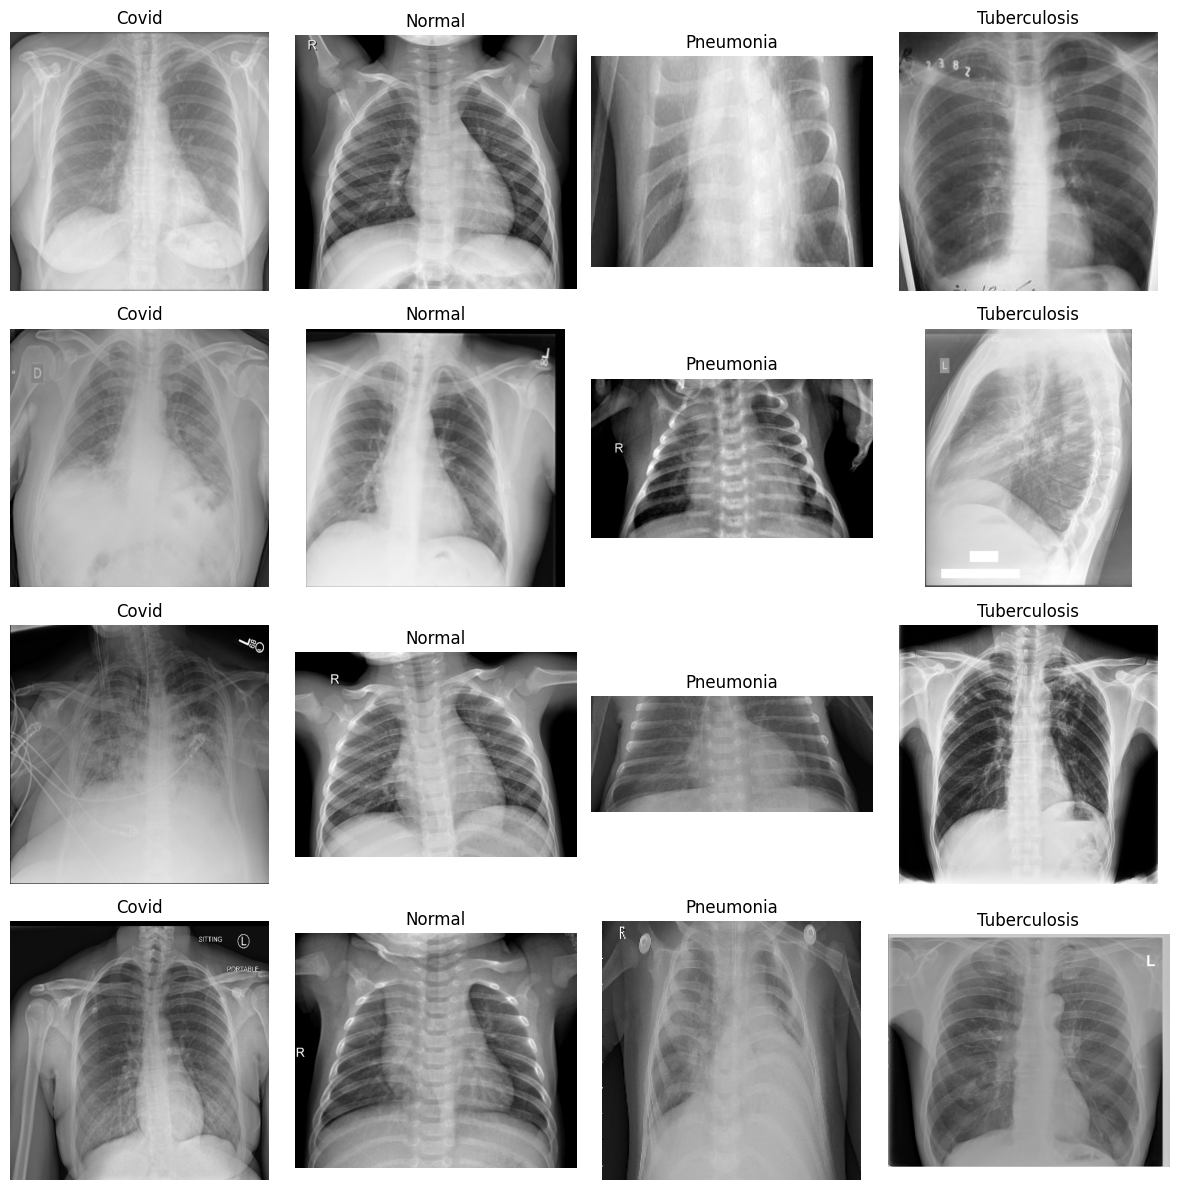

In [25]:
main_folder = r"C:\Data\split_data\test"
subfolders = [f for f in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder,f))]

#Getting images grouped by folder
folder_images = {}
for folder in subfolders:
    path = os.path.join(main_folder,folder)
    images = [os.path.join(path,img) for img in os.listdir(path) if img.lower().endswith((".png", ".jpg", ".jpeg"))]
    random.shuffle(images)
    folder_images[folder] = images


#Round-robin selection
selected_images = []
folder_cycle = cycle(subfolders)
while len(selected_images) < 16:
    folder = next(folder_cycle)
    if folder_images[folder]:
        selected_images.append(folder_images[folder].pop())

#ploting images 
plt.figure(figsize=(12, 12))
for i, img_path in enumerate(selected_images):
    img = cv2.imread(img_path)
    if img is None:
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(4, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(os.path.basename(os.path.dirname(img_path)))  # Show folder name
plt.tight_layout()
plt.show()

Data Processing

In [26]:
image_size = 244
BATCH_SIZE = 32

def cnn_preprocess(x):
    return x/255.0

In [29]:
cnn_train_datagen = ImageDataGenerator(preprocessing_function=cnn_preprocess)
cnn_train_generator = cnn_train_datagen.flow_from_directory(
    train_path,
    target_size=(image_size,image_size),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 57833 images belonging to 4 classes.


In [30]:
cnn_train_generator.class_indices

{'Covid': 0, 'Normal': 1, 'Pneumonia': 2, 'Tuberculosis': 3}

In [32]:
cnn_val_datagen = ImageDataGenerator(preprocessing_function=cnn_preprocess)
cnn_val_generator = cnn_val_datagen.flow_from_directory(
    val_path,
    target_size=(image_size,image_size),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 7232 images belonging to 4 classes.


In [33]:
cnn_val_generator.class_indices

{'Covid': 0, 'Normal': 1, 'Pneumonia': 2, 'Tuberculosis': 3}

In [35]:
cnn_test_datagen = ImageDataGenerator(preprocessing_function=cnn_preprocess)
cnn_test_generator = cnn_test_datagen.flow_from_directory(
        test_path,
        target_size=(image_size,image_size),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 7232 images belonging to 4 classes.


In [36]:
cnn_test_generator.class_indices

{'Covid': 0, 'Normal': 1, 'Pneumonia': 2, 'Tuberculosis': 3}

In [40]:
cnn_model = keras.Sequential([
    keras.layers.Input(shape=(image_size,image_size,3)),
    
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Flatten(),
    keras.layers.Dropout(0.4),
  
    keras.layers.Dense(units=120,activation='relu'),
    keras.layers.Dense(units=120,activation='relu'),
    keras.layers.Dense(units=120,activation='relu'),
  
    keras.layers.Dense(units=len(cnn_test_generator.class_indices),activation='softmax',dtype='float32')
    
])

In [41]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 242, 242, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 121, 121, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 119, 119, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 59, 59, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 57, 57, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │      12,042,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 120)                 │          14,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 120)                 │          14,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             484 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,184,460 (46.48 MB)

 Trainable params: 12,184,460 (46.48 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    ModelCheckpoint(
        filepath='CNN_best_model.keras',
        monitor='val_loss',
        save_best_only=True,
        mode='min'
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3
    )
]

In [43]:
cnn_model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.CategoricalCrossentropy(),
                 metrics=['accuracy',keras.metrics.Precision(name='precision'),keras.metrics.Recall(name='recall')
                          ,keras.metrics.F1Score(name='f1_score')
                         ])

In [44]:
cnn_history = cnn_model.fit(
    cnn_train_generator,
    epochs=20,
    validation_data=cnn_val_generator,
    callbacks=callbacks
             )

Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 609s 3s/step - accuracy: 0.6586 - f1_score: 0.6592 - loss: 0.8380 - precision: 0.7698 - recall: 0.5379 - val_accuracy: 0.8171 - val_f1_score: 0.8190 - val_loss: 0.4771 - val_precision: 0.8433 - val_recall: 0.7889 - learning_rate: 0.0010
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 460s 2s/step - accuracy: 0.8180 - f1_score: 0.8185 - loss: 0.4840 - precision: 0.8572 - recall: 0.7775 - val_accuracy: 0.8595 - val_f1_score: 0.8599 - val_loss: 0.3917 - val_precision: 0.8845 - val_recall: 0.8263 - learning_rate: 0.0010
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 541s 2s/step - accuracy: 0.8597 - f1_score: 0.8601 - loss: 0.3755 - precision: 0.8849 - recall: 0.8359 - val_accuracy: 0.9121 - val_f1_score: 0.9120 - val_loss: 0.2686 - val_precision: 0.9337 - val_recall: 0.8840 - learning_rate: 0.0010
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 480s 2s/step - accuracy: 0.9020 - f1_score: 0.9022 - loss: 0.2791 - precision: 0.9165 - recall: 0.8869 - val_accuracy: 0.9426 - v

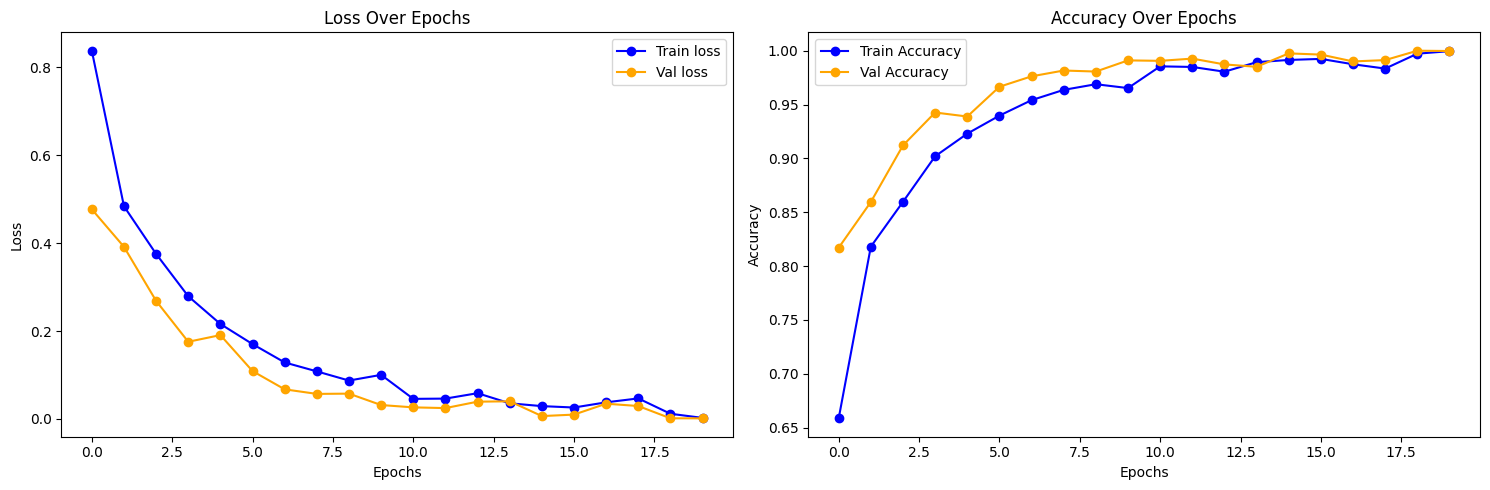

In [54]:
# Plotting training and validation loss and accuracy

plt.figure(figsize=(15,5))

# 📉 Loss
plt.subplot(1,2,1)
plt.plot(cnn_history.history['loss'],label='Train loss',marker='o',color='blue')
plt.plot(cnn_history.history['val_loss'],label='Val loss',marker='o',color='orange')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 📈 Accuracy
plt.subplot(1,2,2)
plt.plot(cnn_history.history['accuracy'],label='Train Accuracy',marker='o',color='blue')
plt.plot(cnn_history.history['val_accuracy'],label='Val Accuracy',marker='o',color='orange')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Model performance testing

In [55]:
cnn_predictions = cnn_model.predict(cnn_test_generator)

226/226 ━━━━━━━━━━━━━━━━━━━━ 175s 772ms/step


In [57]:
cnn_result = cnn_model.evaluate(cnn_test_generator,batch_size=BATCH_SIZE)

226/226 ━━━━━━━━━━━━━━━━━━━━ 123s 543ms/step - accuracy: 0.8950 - f1_score: 0.8951 - loss: 0.9373 - precision: 0.8959 - recall: 0.8938


In [58]:
history = {
    "CNN":{ "accuracy" : cnn_history.history['accuracy'],
           "val_accuracy" : cnn_history.history['val_accuracy'],
           "loss" : cnn_history.history['loss'],
           "val_loss" : cnn_history.history['val_loss']
        
    }}

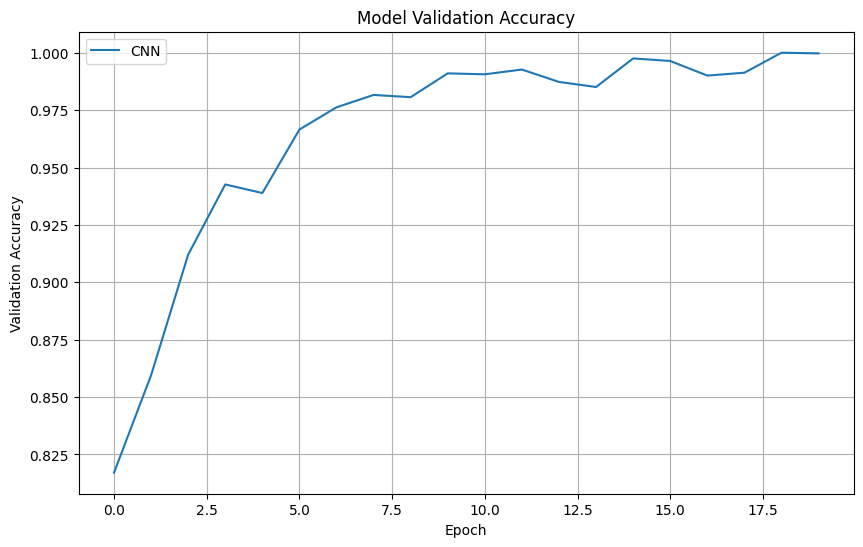

In [59]:
plt.figure(figsize=(10,6))
for model , values in history.items():
    plt.plot(values['val_accuracy'], label=model)
plt.title("Model Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


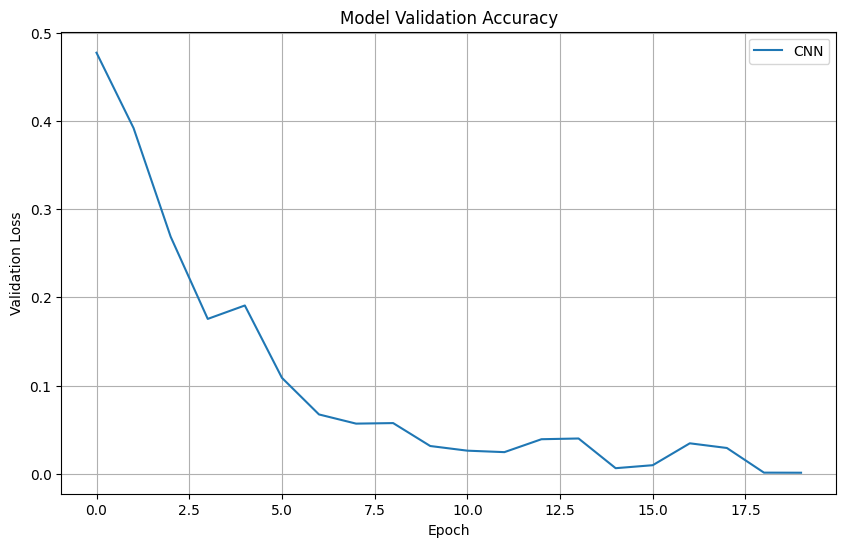

In [60]:
plt.figure(figsize=(10,6))
for model , values in history.items():
    plt.plot(values['val_loss'], label=model)
plt.title("Model Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


TypeError: unsupported format string passed to list.__format__

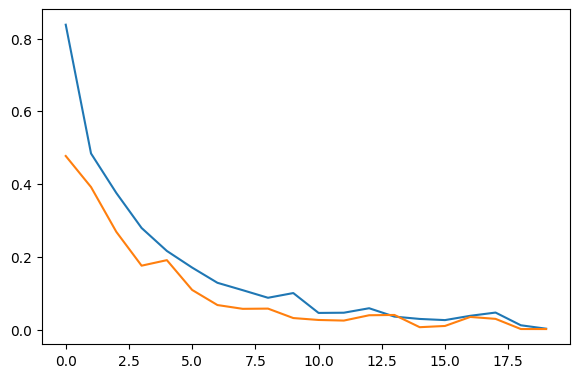

In [64]:
plt.figure(figsize=(15,20))

# sorting the model with least validation loss 
sorted_model = sorted(history.items() , key = lambda x: min(x[1]['val_loss']))

# Ploting each model based on sorted order least val_loss

for i, (model_name, model_history) in enumerate(sorted_model,1):
    plt.subplot(4,2,i)
    plt.plot(model_history['loss'], label = 'Train loss')
    plt.plot(model_history['val_loss'], label = 'Validation loss')

    # find the best epoch based on least val_loss
    min_val_loss_epoch = model_history['val_loss'].index(min(model_history['val_loss']))
    min_val_loss = model_history['val_loss']

    plt.scatter(min_val_loss_epoch,min_val_loss,color='red', label=f'Best Epoch: {min_val_loss_epoch}\nBest Val Loss: {min_val_loss:.4f}')

    plt.title(model_name)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()